# Classically Visualisations

## Purpose: Generate answers to interesting questions using the latest data.

#### Usage
Enter your password in the first cell, then run the first two code cells, then run the other visualizations as needed to answer your questions.

To rerun all visualisations, click 'Kernel -> Restart & Run All".

To generate an HTML file of your results, go to 'File -> Download -> .html'. If you want a pdf, open the HTML file in a web browser then 'print' it as a PDF - this will preserve formatting.

In [1]:
DB_PASS = "PASSHERE"

In [2]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pymysql.cursors

def call_proc(proc_name, args):
    """
    :param proc_name: name of the procedure to call
    :param args: List of arguments to pass to procedure
    :return: pandas datafrom of process results
    """
    # Connect to the database
    db_conn = pymysql.connect(host='classically.c986fzuamnpo.us-east-1.rds.amazonaws.com',
                                 user='admin',
                                 password=DB_PASS,
                                 db='classically',
                                 charset='utf8mb4',
                                 cursorclass=pymysql.cursors.DictCursor)
    try:
        with db_conn.cursor() as cursor:        
            
            cursor.callproc(proc_name, args=args)
            result = cursor.fetchall()

            # pprint(result)
            return pd.DataFrame(result)


    finally:
        db_conn.close()


In [4]:
top_10_all = call_proc('top_10_from_all', [])
bottom_10_all = call_proc('bottom_10_from_all', [])

## Top 10 Songs per service

### Deezer

In [5]:
top_10_deezer = top_10_all.loc[top_10_all['service_name'] == 'Deezer']
top_10_deezer

,title,composer_name,performers,recorded_date,pop_date,service_name,service_rank_noties,measure_type,value
0,One Day,Tate McRae,Tate McRae,2017-12-24,2020-12-05,Deezer,1,deezer_rank,647503
1,Melody,Sheku Kanneh-Mason,Sheku Kanneh-Mason,2020-04-24,2020-12-05,Deezer,2,deezer_rank,628567
2,Experience,Ludovico Einaudi,Ludovico Einaudi,2013-12-02,2020-12-05,Deezer,3,deezer_rank,575627
3,Thunderstruck,2CELLOS,2CELLOS,2015-01-09,2020-12-05,Deezer,4,deezer_rank,540366
4,Tum Hi Ho,Arijit Singh,Arijit Singh,2019-06-10,2020-12-05,Deezer,5,deezer_rank,234998
5,Sanam Re,Arijit Singh,Arijit Singh,2016-12-23,2020-12-05,Deezer,6,deezer_rank,134283
6,Jaise Mera Tu,Arijit Singh,Arijit Singh,2019-06-10,2020-12-05,Deezer,7,deezer_rank,126830
7,Gerua,Arijit Singh,Arijit Singh,2016-04-22,2020-12-05,Deezer,8,deezer_rank,115336
8,Judaa,Arijit Singh,Arijit Singh,2019-06-10,2020-12-05,Deezer,9,deezer_rank,113465
9,Kabhi Jo Baadal Barse,Arijit Singh,Arijit Singh,2019-06-10,2020-12-05,Deezer,10,deezer_rank,112803


### Spotify

In [6]:
top_10_spotify = top_10_all.loc[top_10_all['service_name'] == 'Spotify']
top_10_spotify

,title,composer_name,performers,recorded_date,pop_date,service_name,service_rank_noties,measure_type,value
30,Time,Hans Zimmer,Hans Zimmer,2010-07-09,2020-12-05,Spotify,1,spotify_popularity,72
31,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",Johann Sebastian Bach,Yo-Yo Ma,1983-00-00,2020-12-05,Spotify,2,spotify_popularity,69
32,"The Carnival of the Animals, R. 125: XIII. The...",Camille Saint-Saëns,"Yo-Yo Ma, Kathryn Stott",2015-09-18,2020-12-05,Spotify,3,spotify_popularity,68
33,Handel / Orch. Hale: Keyboard Suite in D Minor...,George Frideric Handel,"Academy of St. Martin in the Fields, Alexander...",2002-00-00,2020-12-05,Spotify,4,spotify_popularity,67
34,The Lark Ascending,Ralph Vaughan Williams,"Tasmin Little, BBC Philharmonic, Andrew Davis",2013-00-00,2020-12-05,Spotify,5,spotify_popularity,66
35,"Chopin: Nocturne No. 20 in C-Sharp Minor, Op. ...",Frédéric Chopin,Mikhail Pletnev,2000-00-00,2020-12-05,Spotify,6,spotify_popularity,66
36,"The Well-Tempered Clavier: Book 1, BWV 846-869...",Johann Sebastian Bach,Lang Lang,2019-03-29,2020-12-05,Spotify,7,spotify_popularity,66
37,Hedwig's Theme,John Williams,John Williams,None,2020-12-05,Spotify,8,spotify_popularity,64
38,Theme From Schindler's List,John Williams,"Itzhak Perlman, Boston Symphony Orchestra",1993-01-01,2020-12-05,Spotify,9,spotify_popularity,64
39,"Symphony No. 5 in C Minor, Op. 67: I. Allegro ...",Ludwig van Beethoven,"Wiener Philharmoniker, Carlos Kleiber",1995-01-01,2020-12-05,Spotify,10,spotify_popularity,63


### Last.fm (By Listeners)

In [7]:
top_10_lastfm_listeners = top_10_all.loc[top_10_all['measure_type'] == 'lastfm_listeners']
top_10_lastfm_listeners

,title,composer_name,performers,recorded_date,pop_date,service_name,service_rank_noties,measure_type,value
10,Für Elise,Ludwig van Beethoven,Ludwig van Beethoven,None,2020-12-05,last.fm,1,lastfm_listeners,488961
12,Clair de lune,Claude Debussy,Claude Debussy,None,2020-12-05,last.fm,2,lastfm_listeners,483911
15,Moonlight Sonata,Ludwig van Beethoven,Ludwig van Beethoven,None,2020-12-05,last.fm,3,lastfm_listeners,354145
17,Orchestral Intro,Gorillaz,Gorillaz,None,2020-12-05,last.fm,4,lastfm_listeners,338895
19,Sur le fil,Yann Tiersen,Yann Tiersen,None,2020-12-05,last.fm,5,lastfm_listeners,324531
20,La Valse d'Amélie (version piano),Yann Tiersen,Yann Tiersen,None,2020-12-05,last.fm,6,lastfm_listeners,319066
23,Le Moulin,Yann Tiersen,Yann Tiersen,None,2020-12-05,last.fm,7,lastfm_listeners,318217
25,La Dispute,Yann Tiersen,Yann Tiersen,None,2020-12-05,last.fm,8,lastfm_listeners,309553
26,Nuvole Bianche,Ludovico Einaudi,Ludovico Einaudi,None,2020-12-05,last.fm,9,lastfm_listeners,292380
29,A quai,Yann Tiersen,Yann Tiersen,None,2020-12-05,last.fm,10,lastfm_listeners,292105


### Last.fm (By Playcount)

In [8]:
top_10_lastfm_playcount = top_10_all.loc[top_10_all['measure_type'] == 'lastfm_playcount']
top_10_lastfm_playcount

,title,composer_name,performers,recorded_date,pop_date,service_name,service_rank_noties,measure_type,value
11,River Flows in You,Yiruma,Yiruma,None,2020-12-05,last.fm,1,lastfm_playcount,2699606
13,Clair de lune,Claude Debussy,Claude Debussy,None,2020-12-05,last.fm,2,lastfm_playcount,2451803
14,La Valse d'Amélie (version piano),Yann Tiersen,Yann Tiersen,None,2020-12-05,last.fm,3,lastfm_playcount,2421841
16,Riverside,Agnes Obel,Agnes Obel,None,2020-12-05,last.fm,4,lastfm_playcount,2077975
18,Nuvole Bianche,Ludovico Einaudi,Ludovico Einaudi,None,2020-12-05,last.fm,5,lastfm_playcount,1939372
21,Sur le fil,Yann Tiersen,Yann Tiersen,None,2020-12-05,last.fm,6,lastfm_playcount,1915365
22,Le Moulin,Yann Tiersen,Yann Tiersen,None,2020-12-05,last.fm,7,lastfm_playcount,1855333
24,Für Elise,Ludwig van Beethoven,Ludwig van Beethoven,None,2020-12-05,last.fm,8,lastfm_playcount,1821437
27,Divenire,Ludovico Einaudi,Ludovico Einaudi,None,2020-12-05,last.fm,9,lastfm_playcount,1768652
28,La Noyée,Yann Tiersen,Yann Tiersen,None,2020-12-05,last.fm,10,lastfm_playcount,1755182


### Tidal

In [9]:
top_10_tidal = top_10_all.loc[top_10_all['service_name'] == 'tidal']
top_10_tidal

,title,composer_name,performers,recorded_date,pop_date,service_name,service_rank_noties,measure_type,value
40,Moonlight Sonata,Ludwig van Beethoven,Ludwig van Beethoven,None,2020-12-05,tidal,1,tidal_popularity,43
41,Claire De Lune,Claude Debussy,Claude Debussy,2012-03-12,2020-12-05,tidal,2,tidal_popularity,41
42,Richter: Written On The Sky,Max Richter,Max Richter,2004-03-23,2020-12-05,tidal,3,tidal_popularity,38
43,The Night King,Ramin Djawadi,Ramin Djawadi,2019-05-19,2020-12-05,tidal,4,tidal_popularity,38
44,Forever Changeless,Nils Frahm,Nils Frahm,2018-01-25,2020-12-05,tidal,5,tidal_popularity,34
45,outsiders,Jean-Michel Blais,Jean-Michel Blais,2018-07-20,2020-12-05,tidal,6,tidal_popularity,33
46,Verses,Ólafur Arnalds,"Ólafur Arnalds, Alice Sara Ott",2015-03-16,2020-12-05,tidal,7,tidal_popularity,33
47,My Friend the Forest,Nils Frahm,Nils Frahm,2018-01-25,2020-12-05,tidal,8,tidal_popularity,33
48,Together At Last,Alexis Ffrench,Alexis Ffrench,2018-11-30,2020-12-05,tidal,9,tidal_popularity,32
49,"Unaccompanied Cello Suite No. 1 in G major, BW...",Johann Sebastian Bach,Yo-Yo Ma,2018-08-17,2020-12-05,tidal,10,tidal_popularity,30


## Bottom 10 Songs Per Service

### Deezer

In [10]:
bottom_10_deezer = bottom_10_all.loc[bottom_10_all['service_name'] == 'Deezer']
bottom_10_deezer

,title,composer_name,performers,recorded_date,pop_date,service_name,service_rank_noties,measure_type,value
0,Life,Matthew L. Fisher,Matthew L. Fisher,2017-09-20,2020-12-05,Deezer,1,deezer_rank,1457
1,Seasons,Matthew L. Fisher,Matthew L. Fisher,2017-09-20,2020-12-05,Deezer,2,deezer_rank,1805
2,Shelter,Matthew L. Fisher,Matthew L. Fisher,2017-09-20,2020-12-05,Deezer,3,deezer_rank,6983
3,Fall,Matthew Fisher,Matthew L. Fisher,2017-09-20,2020-12-05,Deezer,4,deezer_rank,7773
4,Mehram,Arijit Singh,Arijit Singh,2019-06-10,2020-12-05,Deezer,5,deezer_rank,9001
5,The Road,Matthew L. Fisher,Matthew L. Fisher,2017-09-20,2020-12-05,Deezer,6,deezer_rank,11563
6,Winter Cedar,Music for Reading,Music for Reading,2016-11-03,2020-12-05,Deezer,7,deezer_rank,11615
7,Still,Matthew L. Fisher,Matthew L. Fisher,2017-09-20,2020-12-05,Deezer,8,deezer_rank,21341
8,One Last Time,Matthew L. Fisher,Matthew L. Fisher,2017-09-20,2020-12-05,Deezer,9,deezer_rank,21387
9,Khul Kabhi,Arijit Singh,Arijit Singh,2019-06-10,2020-12-05,Deezer,10,deezer_rank,21565


### Spotify

In [11]:
bottom_10_spotify = bottom_10_all.loc[bottom_10_all['service_name'] == 'Spotify']
bottom_10_spotify

,title,composer_name,performers,recorded_date,pop_date,service_name,service_rank_noties,measure_type,value
30,"Requiem in D Minor, K. 626: Lacrimosa",Wolfgang Amadeus Mozart,"The Cavendish Orchestra, The Cavendish Voices,...",2009-06-29,2020-12-05,Spotify,1,spotify_popularity,0
31,"Violin Concerto In E Minor, Op.64, MWV O14: 1....",Felix Mendelssohn,"Orchestre Symphonique de Montréal, Charles Dut...",1982-01-01,2020-12-05,Spotify,2,spotify_popularity,0
32,Dolmen Music,Meredith Monk,"Andrea Goodman, Monica Solem, Paul Langland, J...",1981-06-01,2020-12-05,Spotify,3,spotify_popularity,0
33,For Now I Am Winter,Ólafur Arnalds,"Voces8, Arnor Dan Arnarson",2016-10-21,2020-12-05,Spotify,4,spotify_popularity,0
34,Solomon HWV 67 / Act 3: Sinfony,George Frideric Handel,"Gabrieli, Paul McCreesh",1999-01-01,2020-12-05,Spotify,5,spotify_popularity,0
35,Pictures At An Exhibition: The Hut On Fowl's L...,Modest Mussorgsky,"Orchestre Symphonique de Montréal, Charles Dutoit",1987-01-01,2020-12-05,Spotify,6,spotify_popularity,0
36,On the Nature of Daylight,Max Richter,"Louisa Fuller, Natalia Bonner, John Metcalfe, ...",2014-01-01,2020-12-05,Spotify,7,spotify_popularity,0
37,Il barbiere di Siviglia: Overture (Sinfonia),Gioachino Rossini,"Academy of St. Martin in the Fields, Sir Nevil...",2003-01-01,2020-12-05,Spotify,8,spotify_popularity,0
38,"Requiem in D minor, K.626: 3. Sequentia: Confu...",Wolfgang Amadeus Mozart,"The Monteverdi Choir, John Eliot Gardiner, Eng...",1987-01-01,2020-12-05,Spotify,9,spotify_popularity,0
39,Three Postludes (1981/82): Postlude No. 3,Valentin Silvestrov,"Anja Lechner, Silke Avenhaus",2002-02-19,2020-12-05,Spotify,10,spotify_popularity,0


### Last.fm (By Listeners)

In [12]:
bottom_10_lastfm_listeners = bottom_10_all.loc[bottom_10_all['measure_type'] == 'lastfm_listeners']
bottom_10_lastfm_listeners

,title,composer_name,performers,recorded_date,pop_date,service_name,service_rank_noties,measure_type,value
10,Detach,Hans Zimmer,Hans Zimmer,None,2020-12-05,last.fm,1,lastfm_listeners,67073
12,Andante con moto,Franz Schubert,Franz Schubert,None,2020-12-05,last.fm,2,lastfm_listeners,67105
15,Con Te Partirò,Andrea Bocelli,Andrea Bocelli,None,2020-12-05,last.fm,3,lastfm_listeners,67231
17,Discombobulate,Hans Zimmer,Hans Zimmer,None,2020-12-05,last.fm,4,lastfm_listeners,67290
19,Allegro,Antonio Vivaldi,Wolfgang Amadeus Mozart,None,2020-12-05,last.fm,5,lastfm_listeners,67503
20,The Trees,Max Richter,Max Richter,None,2020-12-05,last.fm,6,lastfm_listeners,67574
23,Summertime,George Gershwin,George Gershwin,None,2020-12-05,last.fm,7,lastfm_listeners,67708
25,Fear And Wonder,Dimmu Borgir,Dimmu Borgir,None,2020-12-05,last.fm,8,lastfm_listeners,67758
26,BabopbyeYa,Janelle Monáe,Janelle Monáe,None,2020-12-05,last.fm,9,lastfm_listeners,67767
29,Atlantico,Roberto Cacciapaglia,Roberto Cacciapaglia,None,2020-12-05,last.fm,10,lastfm_listeners,67976


### Last.fm (By Playcount)

In [13]:
bottom_10_lastfm_playcount = bottom_10_all.loc[bottom_10_all['measure_type'] == 'lastfm_playcount']
bottom_10_lastfm_playcount

,title,composer_name,performers,recorded_date,pop_date,service_name,service_rank_noties,measure_type,value
11,Andante con moto,Franz Schubert,Franz Schubert,None,2020-12-05,last.fm,1,lastfm_playcount,121696
13,Der Lindenbaum,Franz Liszt,Franz Schubert,None,2020-12-05,last.fm,2,lastfm_playcount,130633
14,Lilacs,Sergei Rachmaninoff,Sergei Rachmaninoff,None,2020-12-05,last.fm,3,lastfm_playcount,140653
16,Anitra's Dance,Edvard Grieg,Edvard Grieg,None,2020-12-05,last.fm,4,lastfm_playcount,144889
18,"Finlandia, Op. 26",Jean Sibelius,Jean Sibelius,None,2020-12-05,last.fm,5,lastfm_playcount,151202
21,Largo,Antonín Dvořák,Georg Friedrich Händel,None,2020-12-05,last.fm,6,lastfm_playcount,152152
22,Russian Dance,Pyotr Ilyich Tchaikovsky,Pyotr Ilyich Tchaikovsky,None,2020-12-05,last.fm,7,lastfm_playcount,153484
24,Adagio molto e cantabile,Ludwig van Beethoven,Ludwig van Beethoven,None,2020-12-05,last.fm,8,lastfm_playcount,154249
27,Summertime,George Gershwin,George Gershwin,None,2020-12-05,last.fm,9,lastfm_playcount,157090
28,Jeux d'eau,Maurice Ravel,Maurice Ravel,None,2020-12-05,last.fm,10,lastfm_playcount,159460


### Tidal

In [14]:
bottom_10_tidal = bottom_10_all.loc[bottom_10_all['service_name'] == 'tidal']
bottom_10_tidal

,title,composer_name,performers,recorded_date,pop_date,service_name,service_rank_noties,measure_type,value
40,Act II No. 10: Scene,Russian State Symphony Orchestra,Russian State Symphony Orchestra,2002-11-04,2020-12-05,tidal,1,tidal_popularity,0
41,Winter: Ice,Slovak Radio Symphony Orchestra,Slovak Radio Symphony Orchestra,1991-01-01,2020-12-05,tidal,2,tidal_popularity,0
42,"Rosamunde, D. 797: Rosamunde, D. 797: Ballet M...",Slovak Philharmonic,Slovak Philharmonic Orchestra,1989-01-01,2020-12-05,tidal,3,tidal_popularity,0
43,"Piano Concerto No. 5 in E-Flat Major, Op. 73 ""...",Ludwig van Beethoven,Stefan Vladar,1998-01-01,2020-12-05,tidal,4,tidal_popularity,0
44,"Piano Concerto No. 1 in E Minor, Op. 11: II. R...",Martha Argerich,İdil Biret,1999-09-28,2020-12-05,tidal,5,tidal_popularity,0
45,Panorama,Slovak Radio Symphony Orchestra,Slovak Radio Symphony Orchestra,1991-01-01,2020-12-05,tidal,6,tidal_popularity,0
46,"Adagio for Strings, Op. 11",Samuel Barber,Royal Scottish National Orchestra,2001-03-20,2020-12-05,tidal,7,tidal_popularity,0
47,Tales From the Vienna Woods Waltzes,US Marine Band,US Marine Band,2011-01-01,2020-12-05,tidal,8,tidal_popularity,1
48,La Gioconda: Dance of the Hours,Slovak Radio Symphony Orchestra,Slovak Radio Symphony Orchestra,1988-06-30,2020-12-05,tidal,9,tidal_popularity,1
49,"Clarinet Concerto in A Major, K. 622: II. Adagio",Ernst Ottensamer,Ernst Ottensamer,1990-07-02,2020-12-05,tidal,10,tidal_popularity,1


In [15]:
POP_MEASURE_TYPES = {
    1: "deezer_rank",
    2: "spotify_popularity",
    3: "lastfm_playcount",
    4: "lastfm_listeners",
    5: "tidal_popularity",
}
plt.rcParams.update({'font.size': 22})

## Popularity Trends for Selected Holiday or Classical Songs 

### Christmas Canon

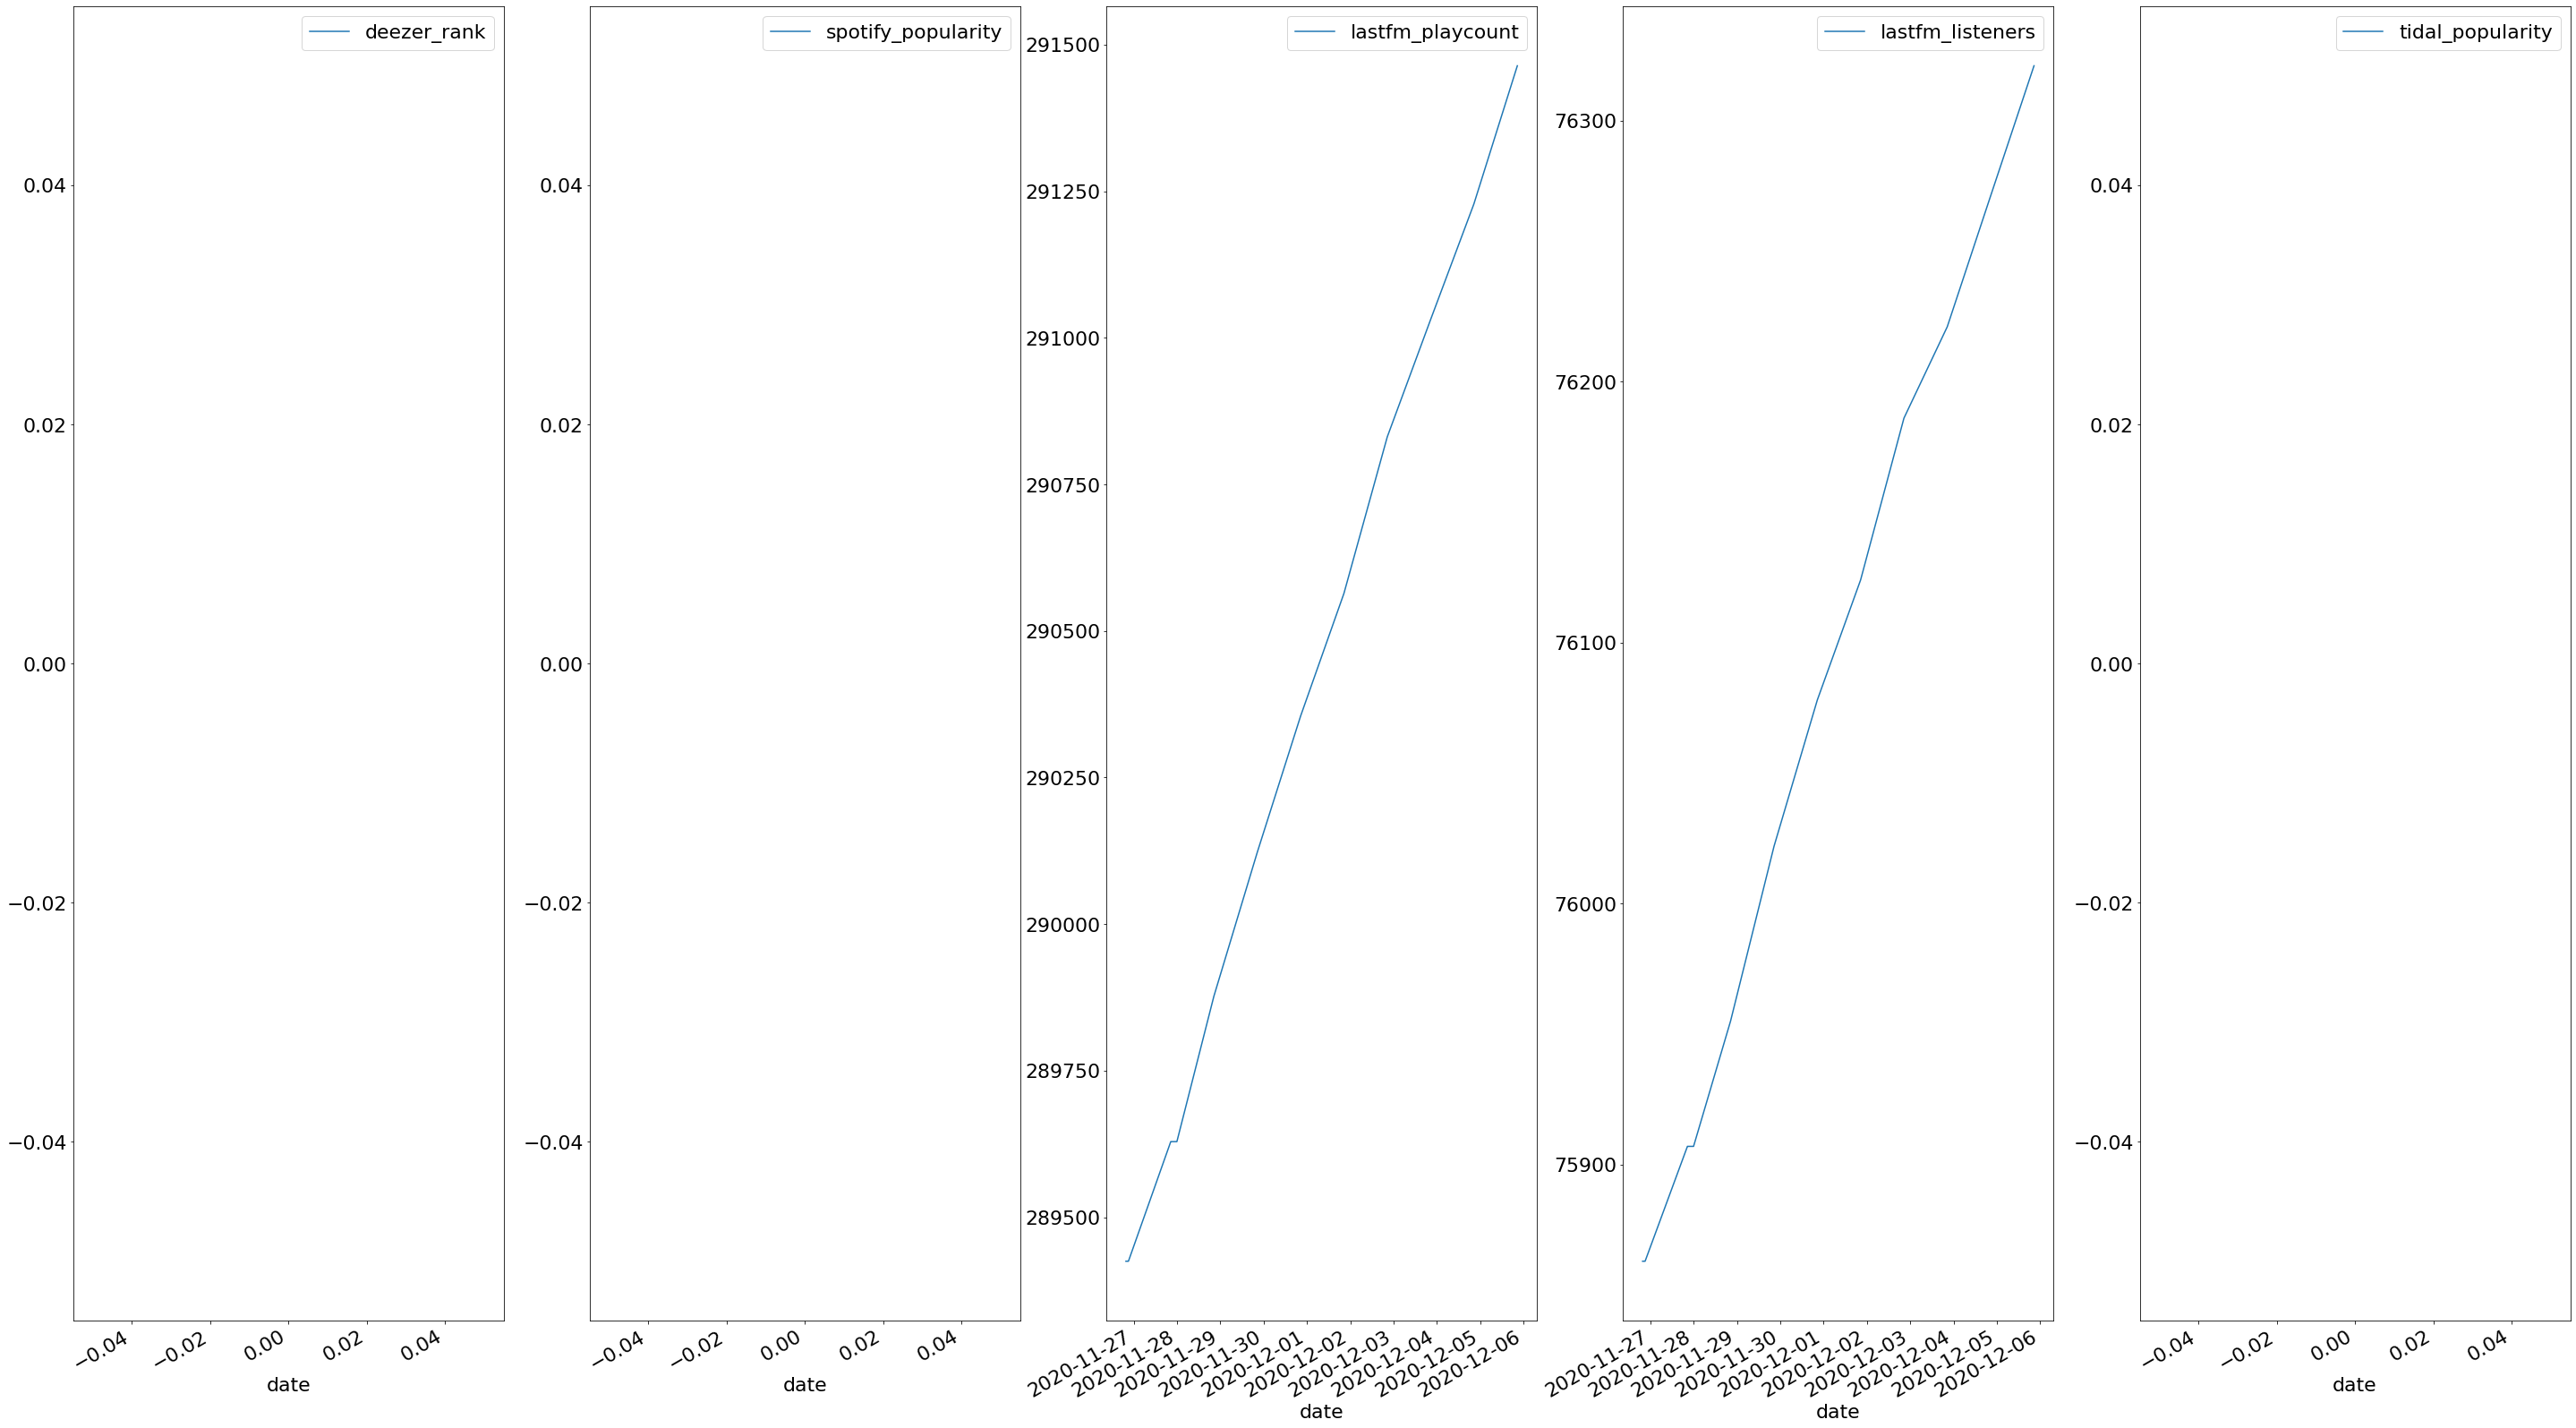

In [16]:
cc_stats = call_proc('get_holiday_song_stats', ['Christmas Canon'])
fig, axs = plt.subplots(1, 5)
for key in POP_MEASURE_TYPES.keys():  
    grp = cc_stats.loc[key == cc_stats['pop_measure_type_id']]
    grp.plot.line(ax=axs[key-1], x='date', y='popularity_value', label=POP_MEASURE_TYPES[key], figsize=(50, 30))


### O Holy Night

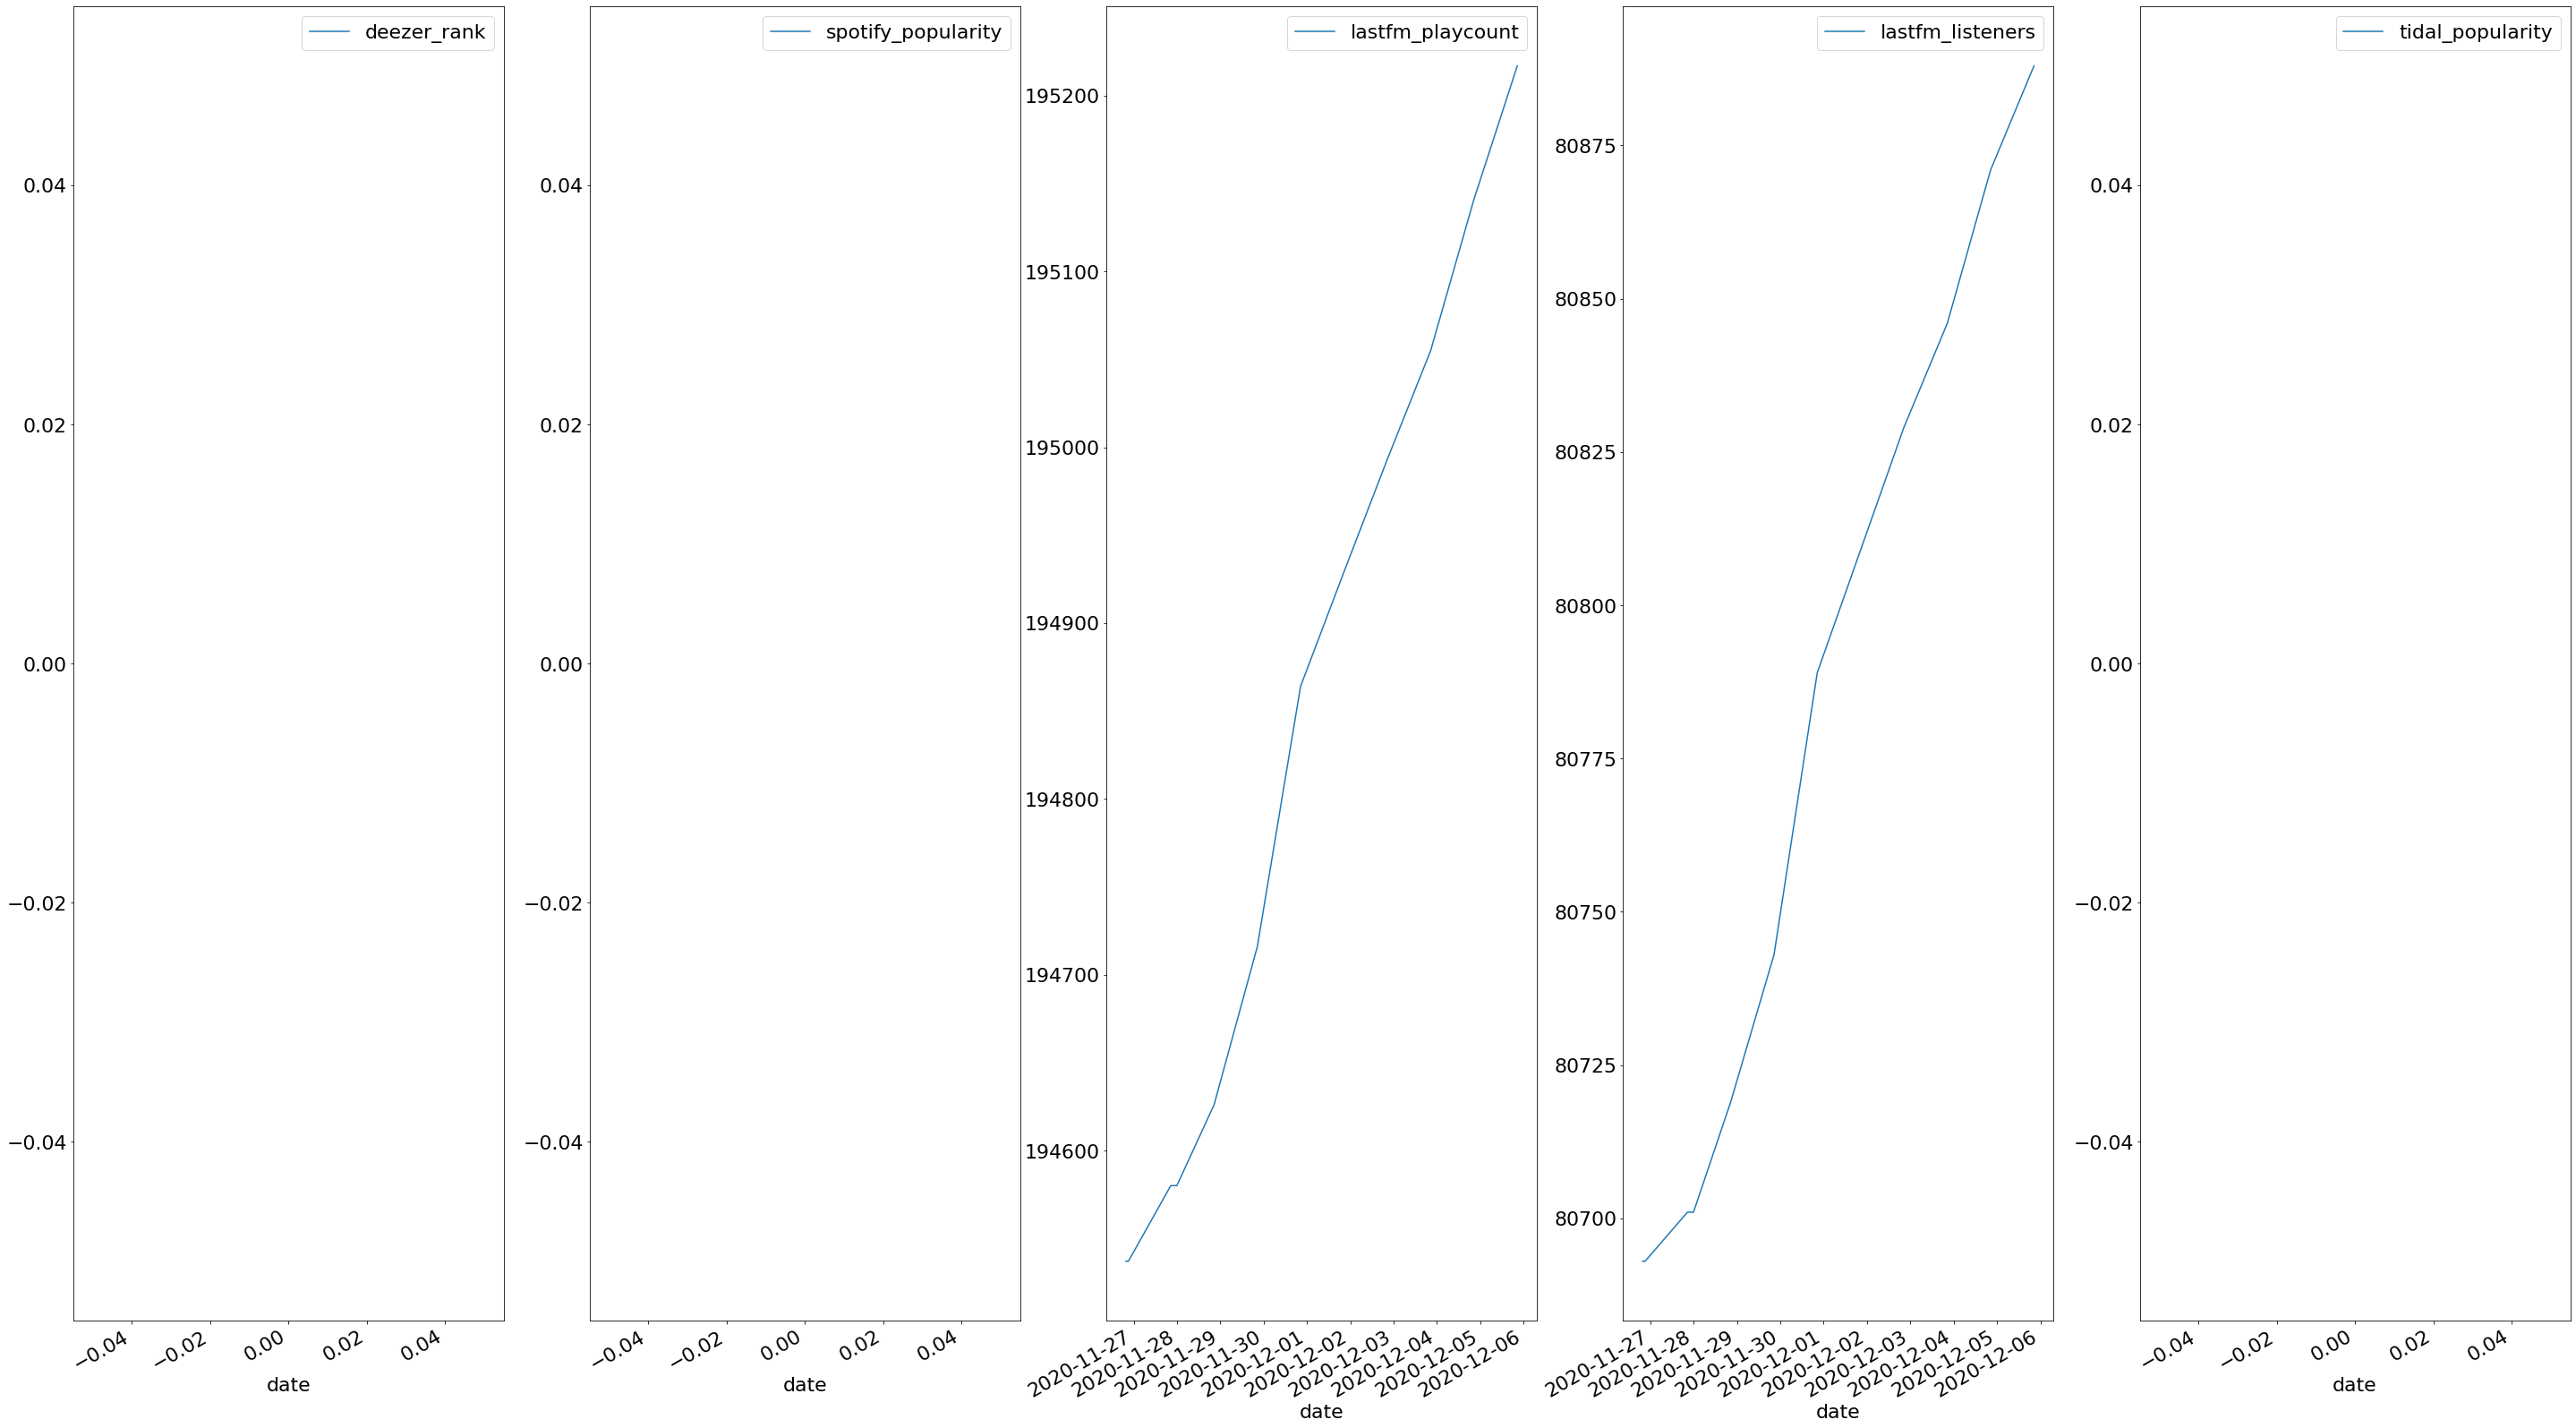

In [17]:
ohn_stats = call_proc('get_holiday_song_stats', ['O Holy Night'])
fig, axs = plt.subplots(1, 5)
for key in POP_MEASURE_TYPES.keys():  
    grp = ohn_stats.loc[key == ohn_stats['pop_measure_type_id']]
    grp.plot.line(ax=axs[key-1], x='date', y='popularity_value', label=POP_MEASURE_TYPES[key], figsize=(50, 30))

### Messiah: No. 7. "And He shall purify" from Part One 

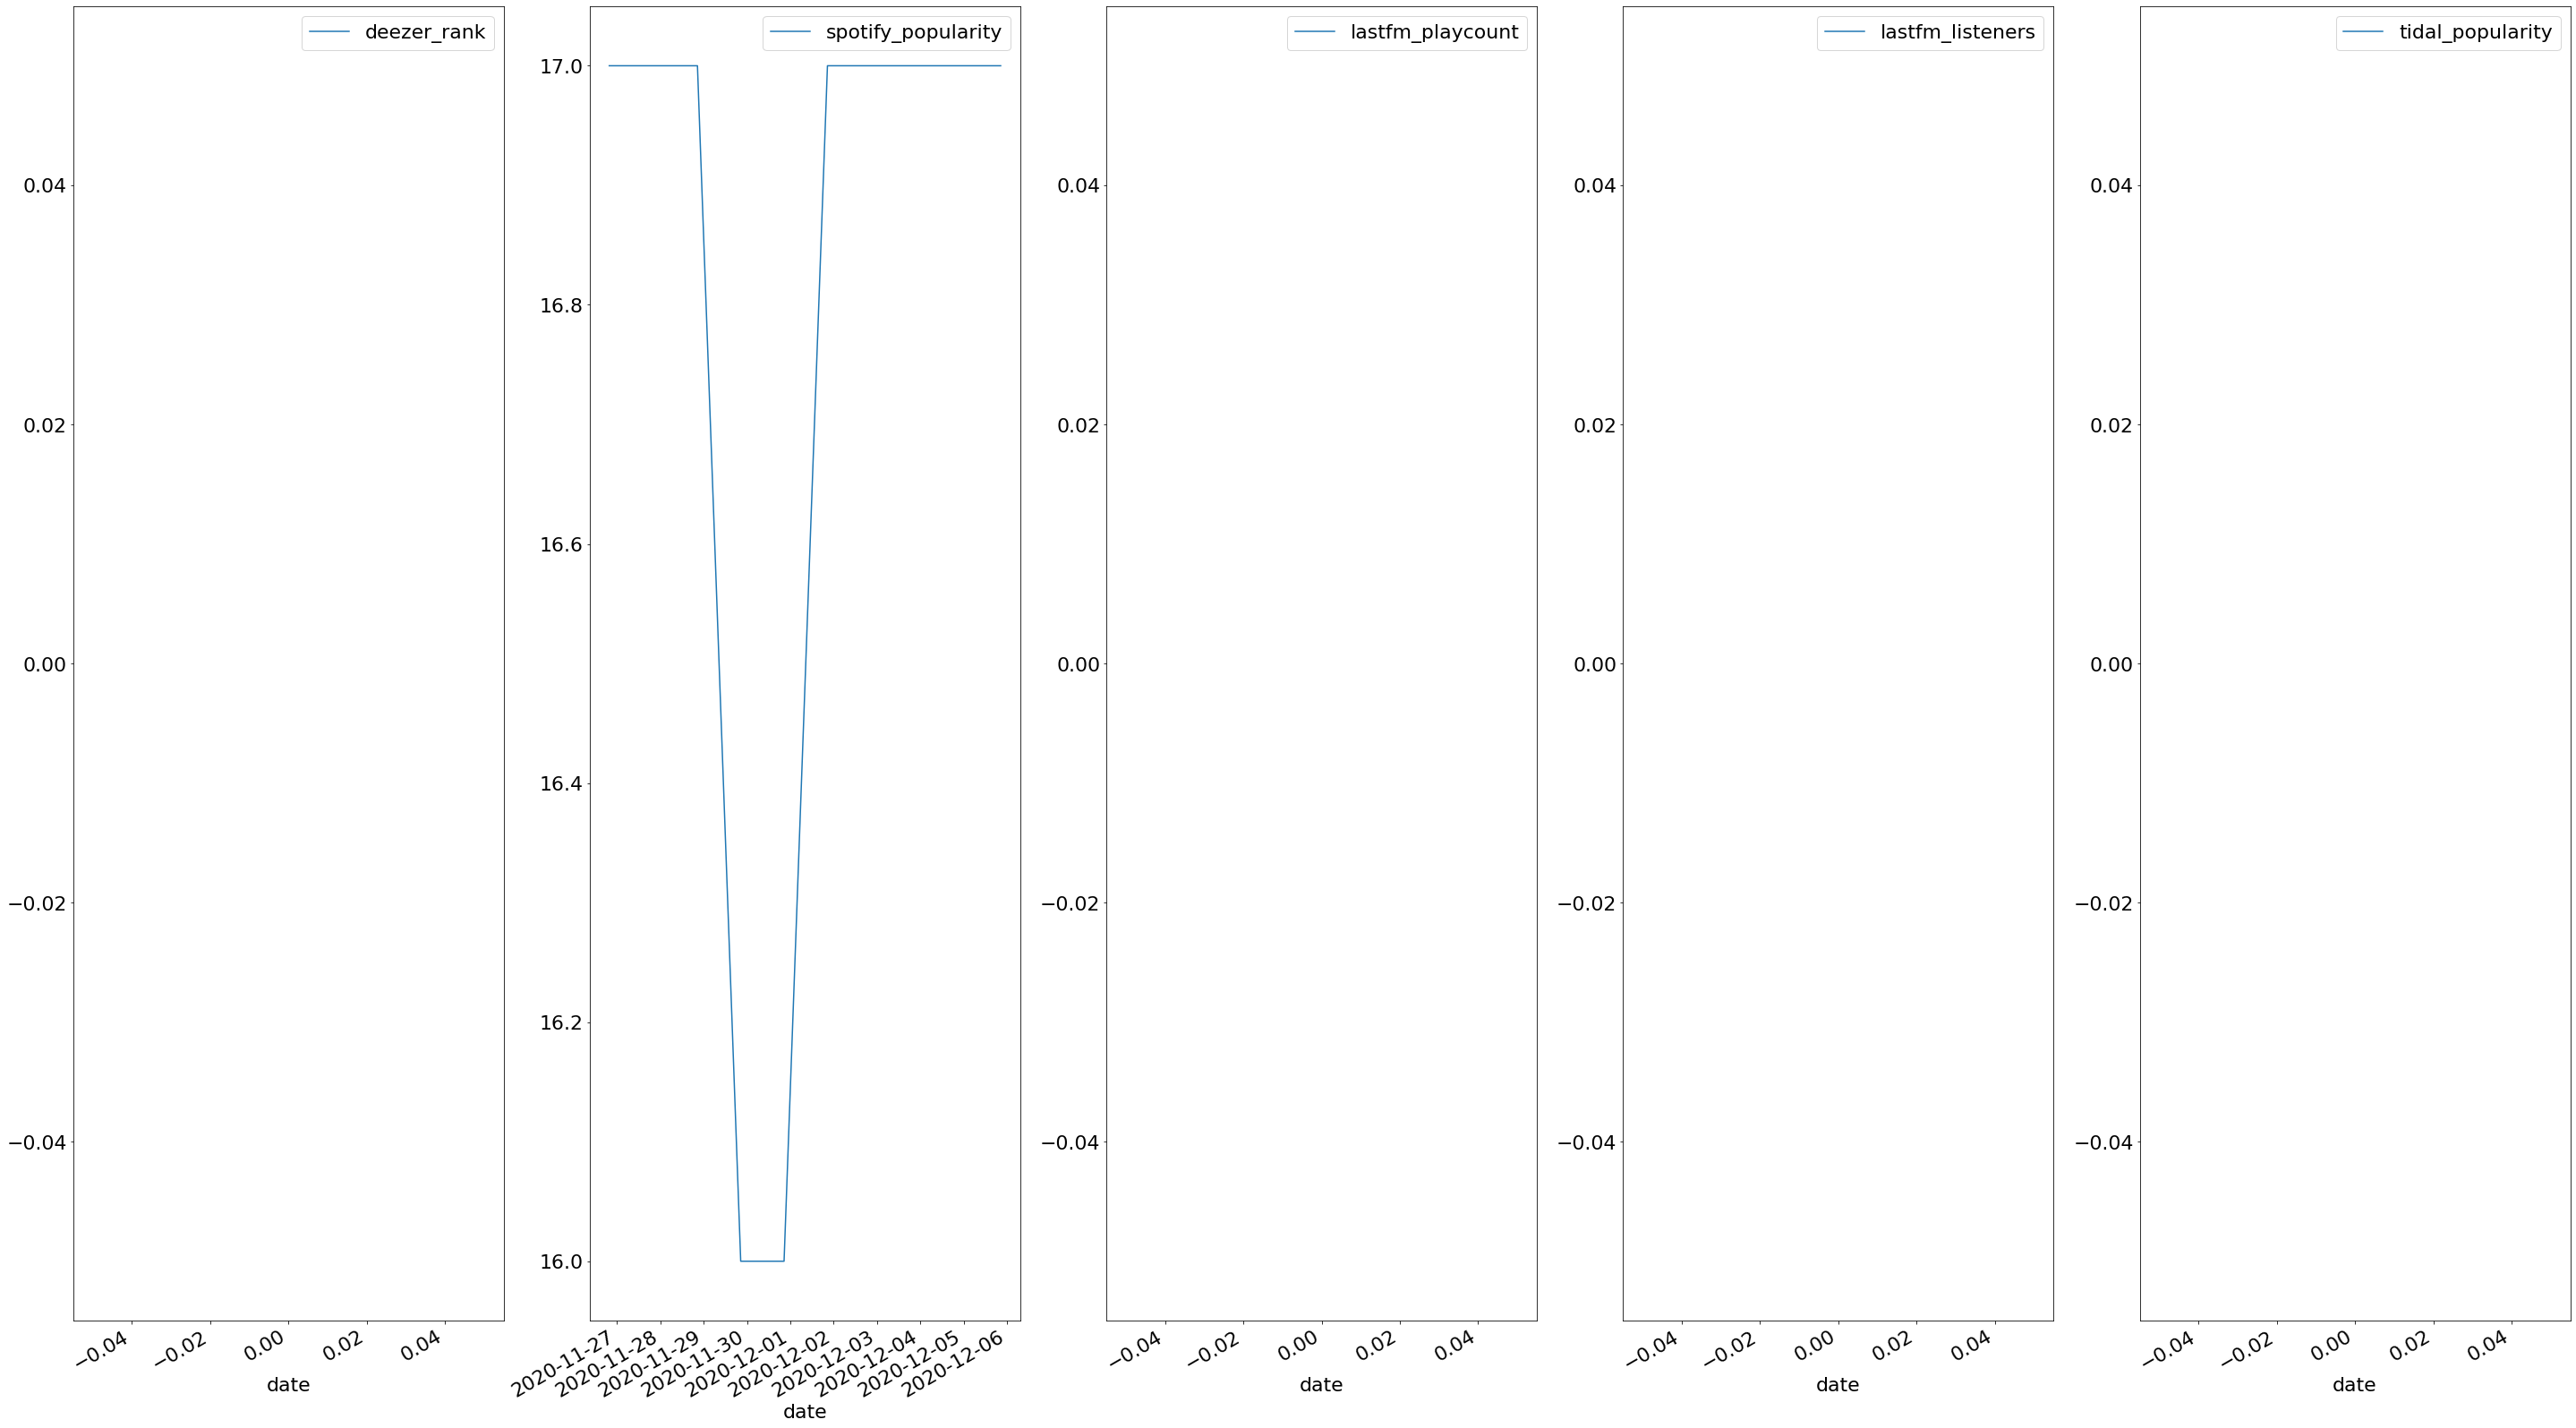

In [18]:
m_stats = call_proc('get_holiday_song_stats', ['Messiah: No. 7. "And He shall purify" from Part One'])
fig, axs = plt.subplots(1, 5)
for key in POP_MEASURE_TYPES.keys():  
    grp = m_stats.loc[key == m_stats['pop_measure_type_id']]
    grp.plot.line(ax=axs[key-1], x='date', y='popularity_value', label=POP_MEASURE_TYPES[key], figsize=(50, 30))

### Dance of the Sugar Plum Fairy

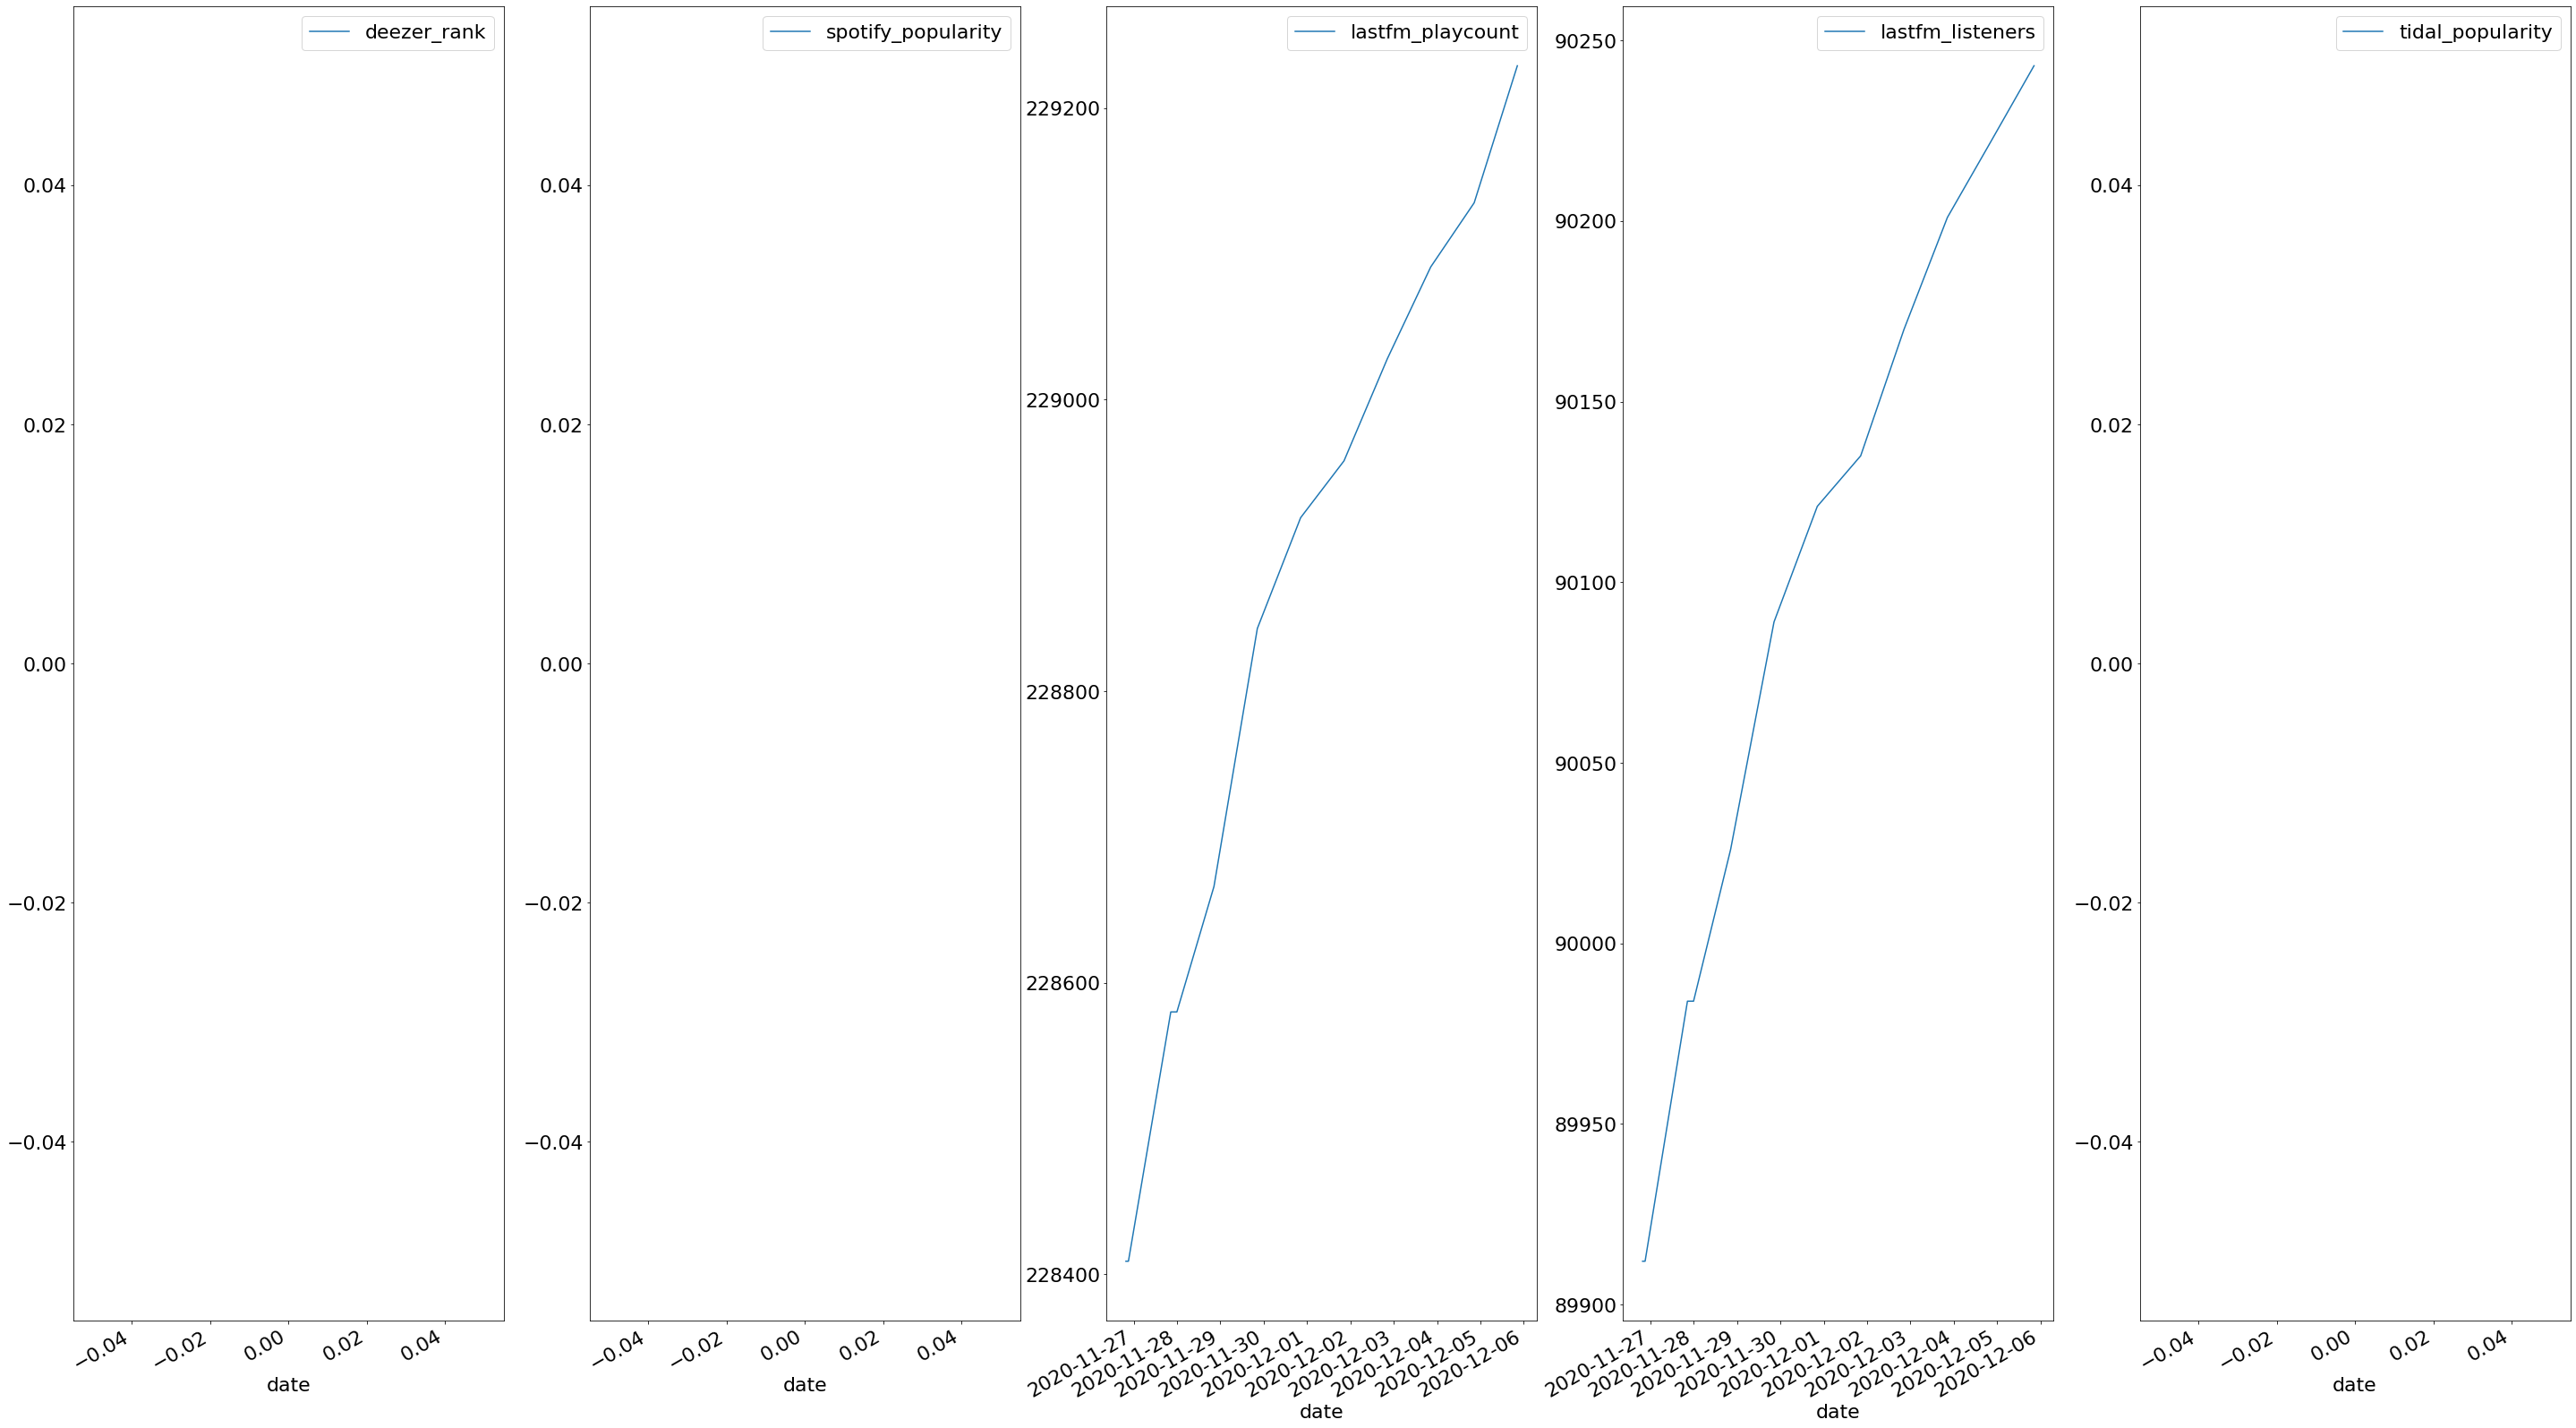

In [19]:
spf_stats = call_proc('get_holiday_song_stats', ['Dance of the Sugar Plum Fairy'])
fig, axs = plt.subplots(1, 5)
for key in POP_MEASURE_TYPES.keys():    
    grp = spf_stats.loc[key == spf_stats['pop_measure_type_id']]
    grp.plot.line(ax=axs[key-1], x='date', y='popularity_value', label=POP_MEASURE_TYPES[key], figsize=(50, 30))

### Moonlight Sonata

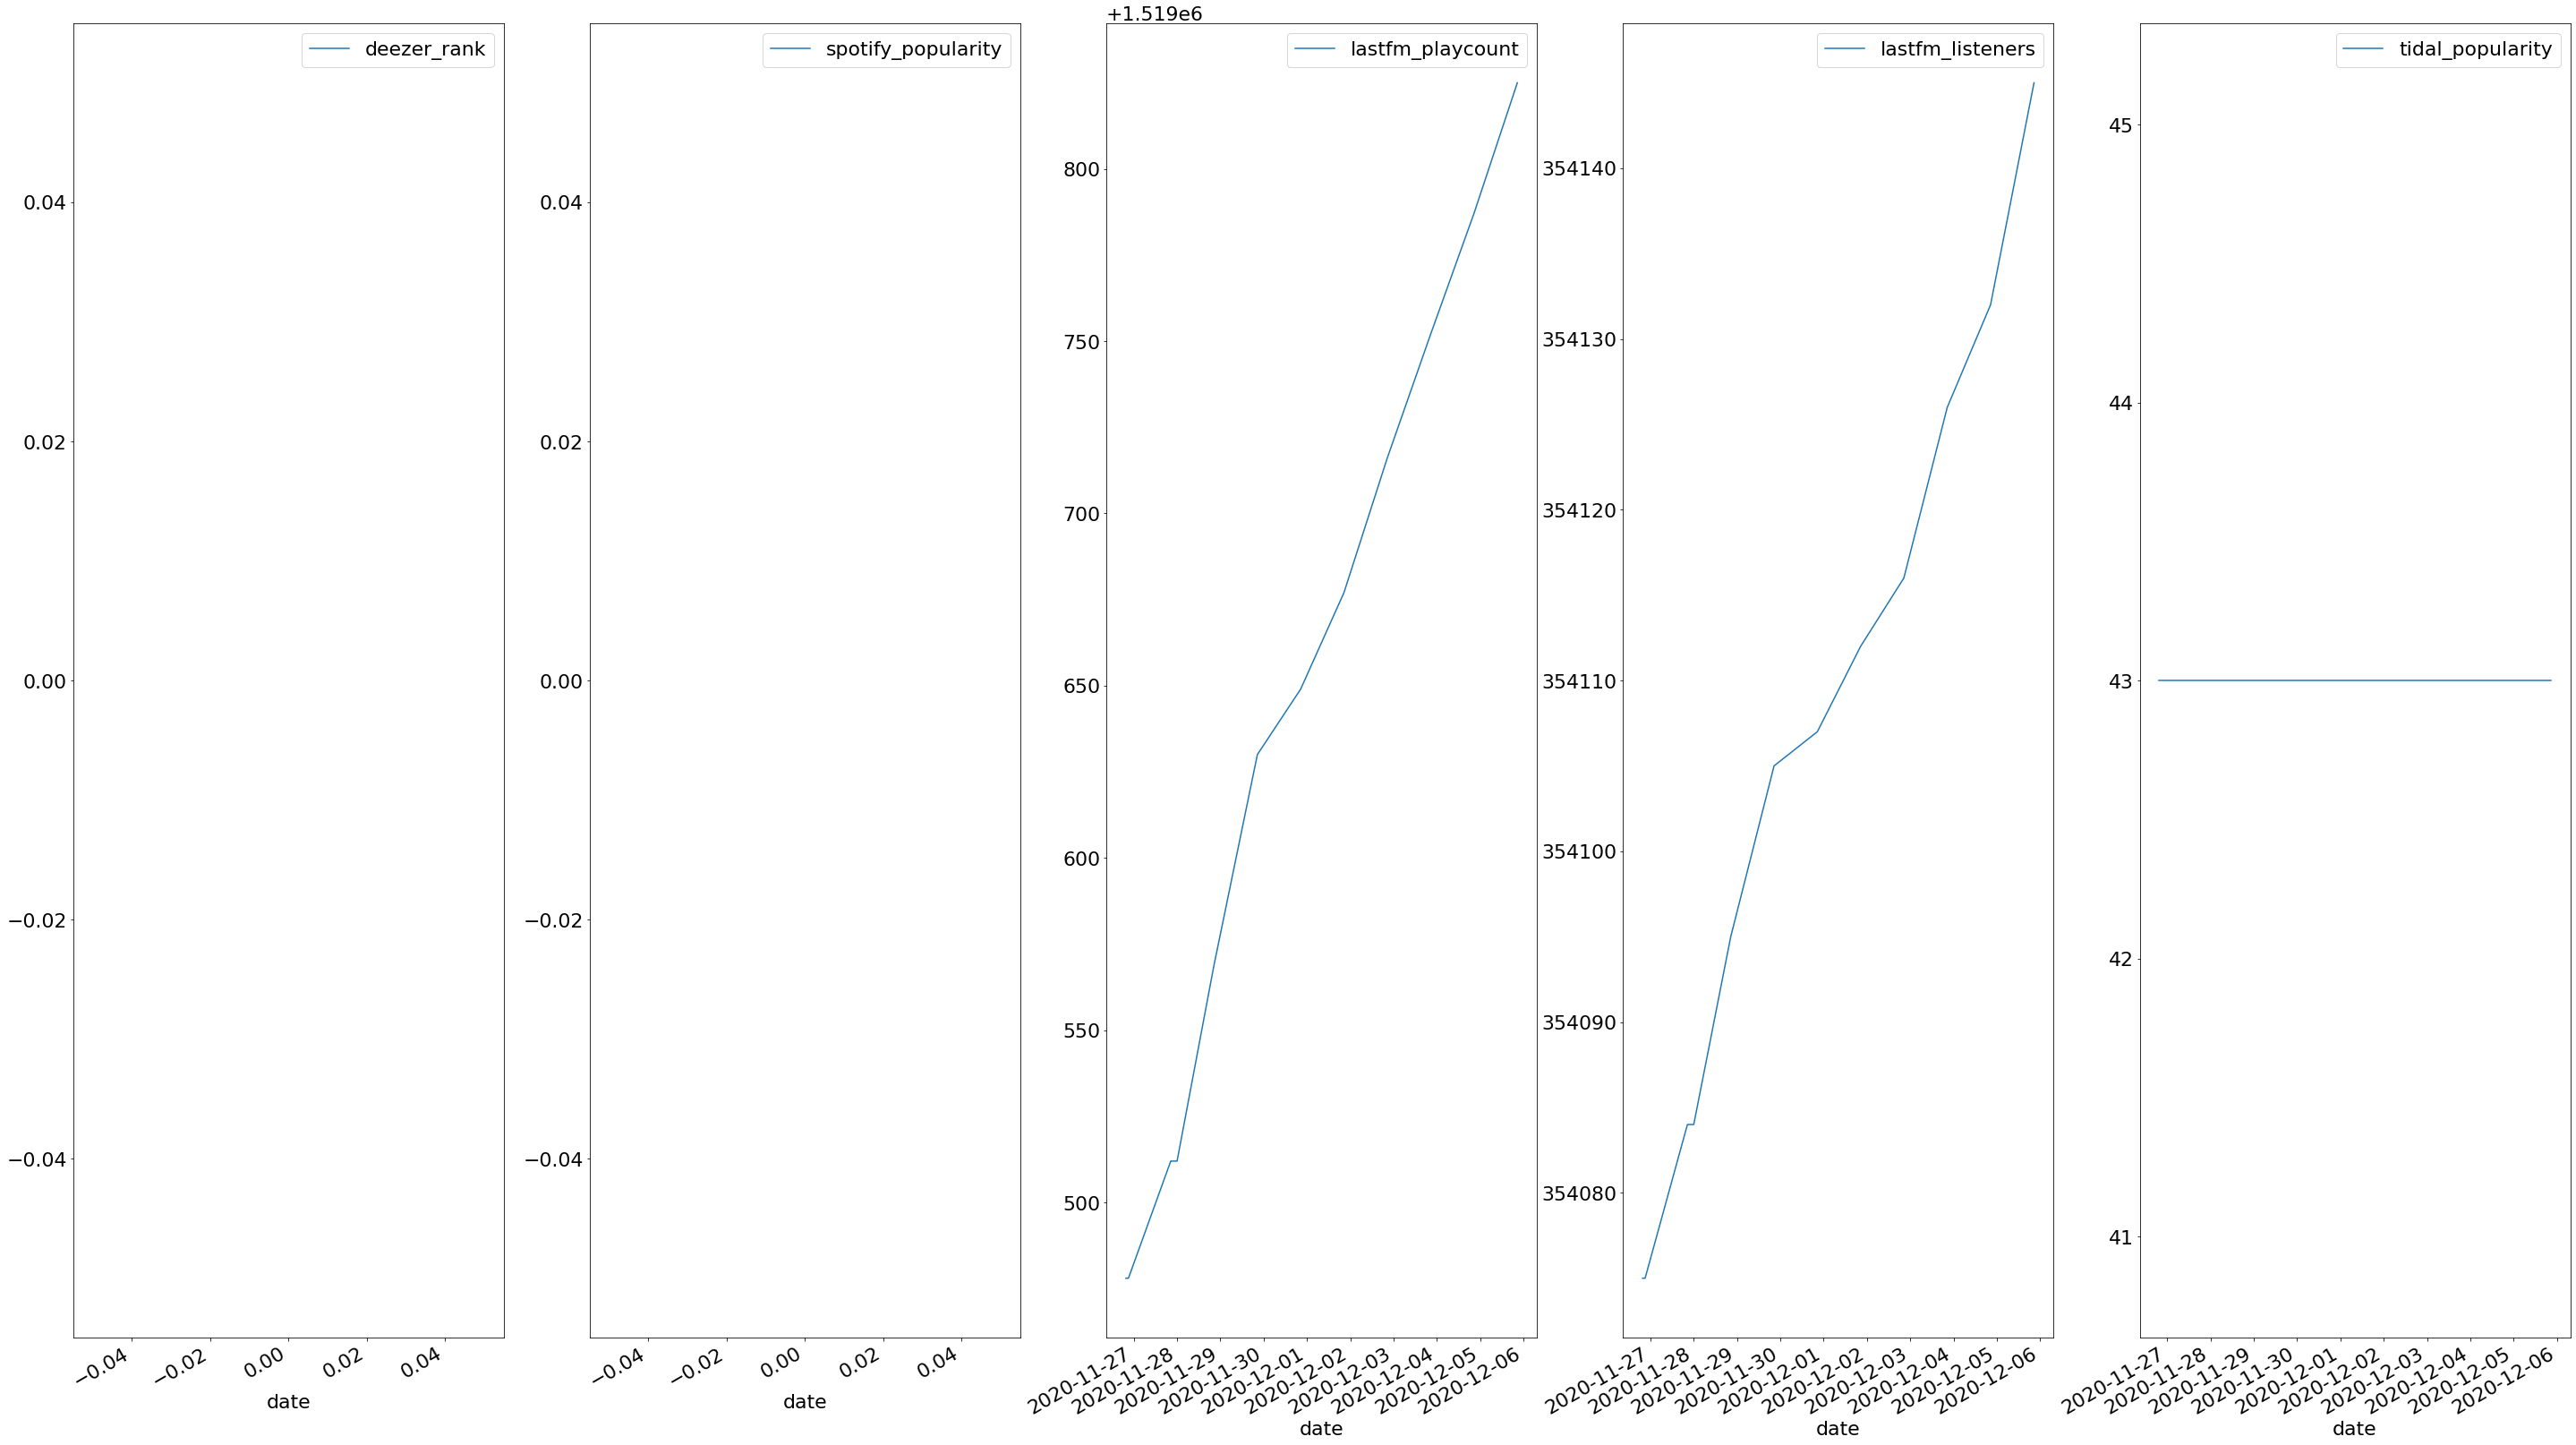

In [20]:
ms_stats = call_proc('get_holiday_song_stats', ['Moonlight Sonata'])
fig, axs = plt.subplots(1, 5)
for key in POP_MEASURE_TYPES.keys():    
    grp = ms_stats.loc[key == ms_stats['pop_measure_type_id']]
    grp.plot.line(ax=axs[key-1], x='date', y='popularity_value', label=POP_MEASURE_TYPES[key], figsize=(50, 30))
    

In [21]:
top_10_composers = call_proc('GET_TOP_COMPOSERS', [1, 10]) 
top_10_performers = call_proc('GET_TOP_PERFORMERS', [1, 10])

## Top 10 Composers and Performers Per Service

### Deezer

In [22]:
top_10_comp_deezer = top_10_composers.loc[top_10_composers['pop_measure_type_id'] == 1]
top_10_comp_deezer

,source_rank,pop_measure_type_id,composer_name,avg_popularity,num_songs
0,1,1,Ludovico Einaudi,337814,2
1,2,1,Ólafur Arnalds,100000,2
2,3,1,Andrea Bocelli,100000,14
3,4,1,Arijit Singh,65366,62
4,5,1,Study Music & Sounds,47190,2
5,6,1,Concentration Music for Work,37630,3
6,7,1,Music for Reading,34352,20
7,8,1,Matthew L. Fisher,14458,9


In [23]:
top_10_perf_deezer = top_10_performers.loc[top_10_performers['pop_measure_type_id'] == 1]
top_10_perf_deezer

,source_rank,pop_measure_type_id,performer_name,avg_popularity,num_recordings
0,1,1,Ludovico Einaudi,337814,2
1,2,1,Ólafur Arnalds,100000,2
2,3,1,KHATIA BUNIATISHVILI,100000,18
3,4,1,Andrea Bocelli,100000,16
4,5,1,Aldo Romano,90052,13
5,6,1,Arijit Singh,67473,99
6,7,1,Hermann Baumann,43843,3
7,8,1,Sesto Bruscantini,40291,35
8,9,1,Philharmonia Orchestra,39946,45
9,10,1,Riccardo Muti,37991,44


### Spotify

In [24]:
top_10_comp_spotify = top_10_composers.loc[top_10_composers['pop_measure_type_id'] == 2]
top_10_comp_spotify

,source_rank,pop_measure_type_id,composer_name,avg_popularity,num_songs
8,1,2,John Williams,64,3
9,2,2,Erik Satie,59,3
10,3,2,Edward Elgar,52,3
11,4,2,Georges Bizet,47,3
12,5,2,Sergei Rachmaninoff,46,3
13,6,2,Joaquín Rodrigo,46,2
14,7,2,Johannes Brahms,45,4
15,8,2,Alexander Borodin,44,2
16,9,2,Maurice Ravel,43,6
17,10,2,Edvard Grieg,42,8


In [25]:
top_10_perf_spotify = top_10_performers.loc[top_10_performers['pop_measure_type_id'] == 2]
top_10_perf_spotify

,source_rank,pop_measure_type_id,performer_name,avg_popularity,num_recordings
10,1,2,Yo-Yo Ma,66,3
11,2,2,John Williams,64,2
12,3,2,Lang Lang,61,4
13,4,2,Itzhak Perlman,61,2
14,5,2,Benjamin Grosvenor,58,2
15,6,2,Tasmin Little,57,2
16,7,2,Sir Simon Rattle,57,2
17,8,2,Andrew Davis,57,2
18,9,2,Jean-Yves Thibaudet,56,2
19,10,2,David Bell,55,2


### Last.fm (By Playcount)

In [26]:
top_10_comp_lastfm_pl = top_10_composers.loc[top_10_composers['pop_measure_type_id'] == 3]
top_10_comp_lastfm_pl

,source_rank,pop_measure_type_id,composer_name,avg_popularity,num_songs
18,1,3,Yann Tiersen,1077729,13
19,2,3,Clint Mansell,829531,8
20,3,3,Lindsey Stirling,829238,5
21,4,3,Agnes Obel,818869,7
22,5,3,Claude Debussy,800521,3
23,6,3,Ludovico Einaudi,763443,23
24,7,3,Birdy,674682,4
25,8,3,Arvo Pärt,599385,2
26,9,3,Max Richter,562165,12
27,10,3,Alexandre Desplat,555906,2


In [27]:
top_10_perf_lastfm_pl = top_10_performers.loc[top_10_performers['pop_measure_type_id'] == 3]
top_10_perf_lastfm_pl

,source_rank,pop_measure_type_id,performer_name,avg_popularity,num_recordings
20,1,3,Yiruma,1787240,2
21,2,3,Yann Tiersen,988273,15
22,3,3,Clint Mansell,829531,8
23,4,3,Lindsey Stirling,829238,5
24,5,3,Agnes Obel,818869,7
25,6,3,Claude Debussy,800521,3
26,7,3,Ludovico Einaudi,773272,24
27,8,3,Birdy,674682,4
28,9,3,Arvo Pärt,599385,2
29,10,3,Alexandre Desplat,555906,2


### Last.fm (By Listeners)

In [28]:
top_10_comp_lastfm_ls = top_10_composers.loc[top_10_composers['pop_measure_type_id'] == 4]
top_10_comp_lastfm_ls

,source_rank,pop_measure_type_id,composer_name,avg_popularity,num_songs
28,1,4,Yann Tiersen,187083,13
29,2,4,Claude Debussy,187062,3
30,3,4,Samuel Barber,168913,2
31,4,4,Johannes Brahms,166288,2
32,5,4,Ludwig van Beethoven,163876,9
33,6,4,Johann Pachelbel,154352,3
34,7,4,Richard Wagner,147460,2
35,8,4,Eluvium,139955,2
36,9,4,George Gershwin,137937,2
37,10,4,Agnes Obel,137833,7


In [29]:
top_10_perf_lastfm_ls = top_10_performers.loc[top_10_performers['pop_measure_type_id'] == 4]
top_10_perf_lastfm_ls

,source_rank,pop_measure_type_id,performer_name,avg_popularity,num_recordings
30,1,4,Yiruma,198443,2
31,2,4,Claude Debussy,187062,3
32,3,4,Yann Tiersen,172887,15
33,4,4,Samuel Barber,168913,2
34,5,4,Johannes Brahms,166288,2
35,6,4,Ludwig van Beethoven,163876,9
36,7,4,Johann Pachelbel,154352,3
37,8,4,Richard Wagner,147460,2
38,9,4,Tomaso Giovanni Albinoni,143068,2
39,10,4,Eluvium,139955,2


### Tidal

In [30]:
top_10_comp_tidal = top_10_composers.loc[top_10_composers['pop_measure_type_id'] == 5]
top_10_comp_tidal

,source_rank,pop_measure_type_id,composer_name,avg_popularity,num_songs
38,1,5,Ólafur Arnalds,31,2
39,2,5,Ramin Djawadi,30,2
40,3,5,Nils Frahm,29,3
41,4,5,Yann Tiersen,23,2
42,5,5,Chilly Gonzales,23,2
43,6,5,RIOPY,22,3
44,7,5,Joep Beving,22,2
45,8,5,Claude Debussy,21,2
46,9,5,Agnes Obel,21,3
47,10,5,Andreas Ihlebæk,21,2


In [31]:
top_10_perf_tidal = top_10_performers.loc[top_10_performers['pop_measure_type_id'] == 5]
top_10_perf_tidal

,source_rank,pop_measure_type_id,performer_name,avg_popularity,num_recordings
40,1,5,Yuki Numata Resnick,34,2
41,2,5,Ólafur Arnalds,31,2
42,3,5,Ramin Djawadi,30,2
43,4,5,Nils Frahm,29,3
44,5,5,Venice Baroque Orchestra,29,2
45,6,5,Avi Avital,29,2
46,7,5,Ludwig van Beethoven,28,2
47,8,5,Alice Sara Ott,26,2
48,9,5,Valentina Lisitsa,26,2
49,10,5,Grace Davidson,25,2


In [32]:
# this cell takes a while
composer_changes = {i: call_proc('composer_popularity_change_on_service', [i]).astype({'avg_change': 'float'}).sort_values('avg_change', ascending=False).dropna() for i in range(1,6)}

performer_changes = {i: call_proc('performer_popularity_change_on_service', [i]).astype({'avg_change': 'float'}).sort_values('avg_change', ascending=False).dropna() for i in range(1,6)}


In [33]:
plt.rcParams.update({'font.size': 15})

## Largest Percentage Changes in Composer/Performer Popularity Per Service 
### Since 11/26/2020

### Deezer

<AxesSubplot:xlabel='composer_name'>

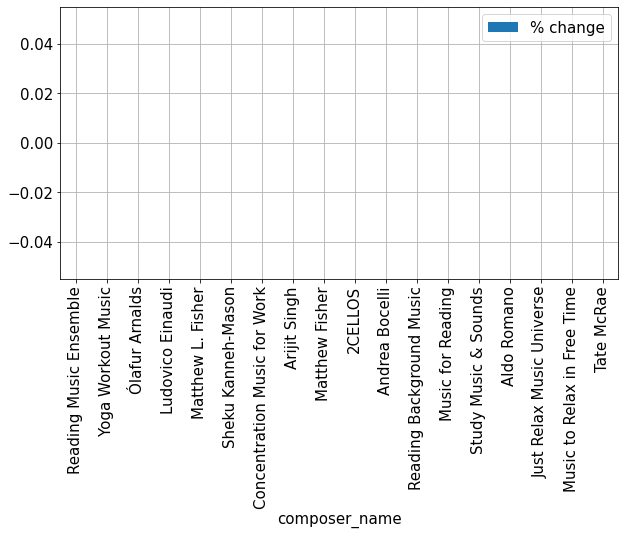

In [34]:
top_bottom_10_comp_deez = composer_changes[1][:10].append(composer_changes[1][-10:]).drop_duplicates()
top_bottom_10_comp_deez.plot.bar(x='composer_name', y='avg_change', grid=True, label='% change', figsize=(10, 5))

### Spotify 

<AxesSubplot:xlabel='composer_name'>

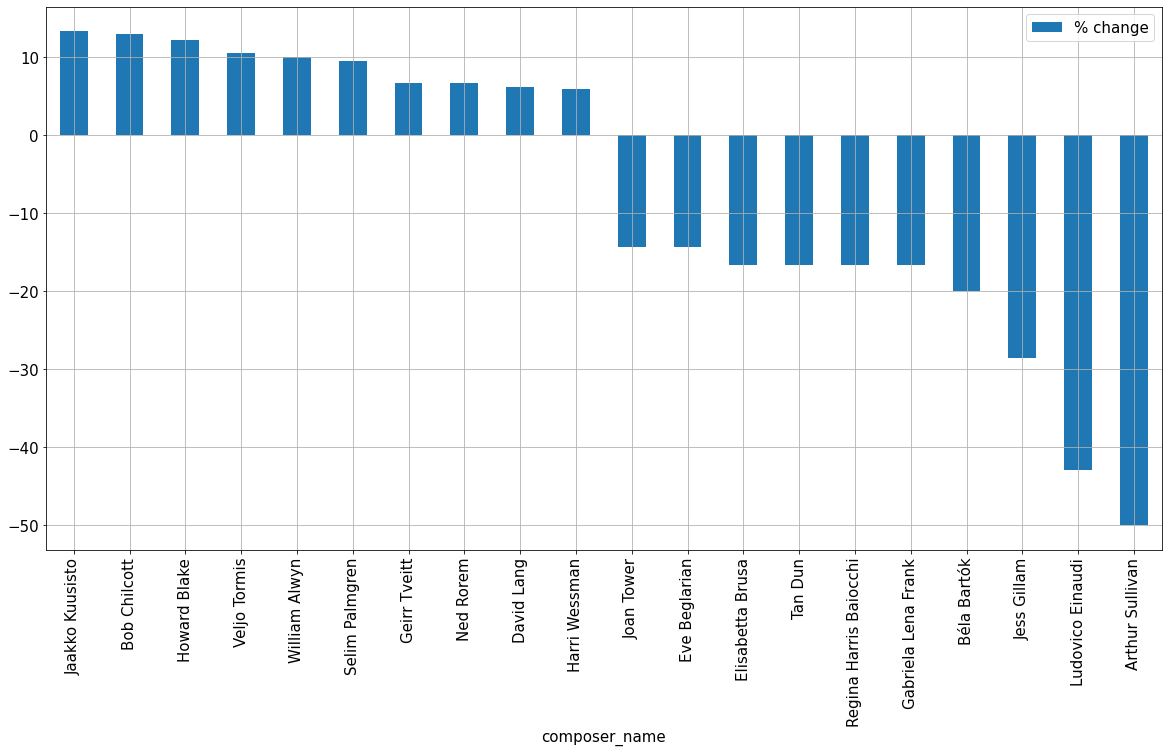

In [35]:
top_bottom_10_comp_spotify = composer_changes[2][:10].append(composer_changes[2][-10:]).drop_duplicates()
top_bottom_10_comp_spotify.plot.bar(x='composer_name', y='avg_change', grid=True, label='% change', figsize=(20, 10))

### Last.fm (By Playcount)

<AxesSubplot:xlabel='composer_name'>

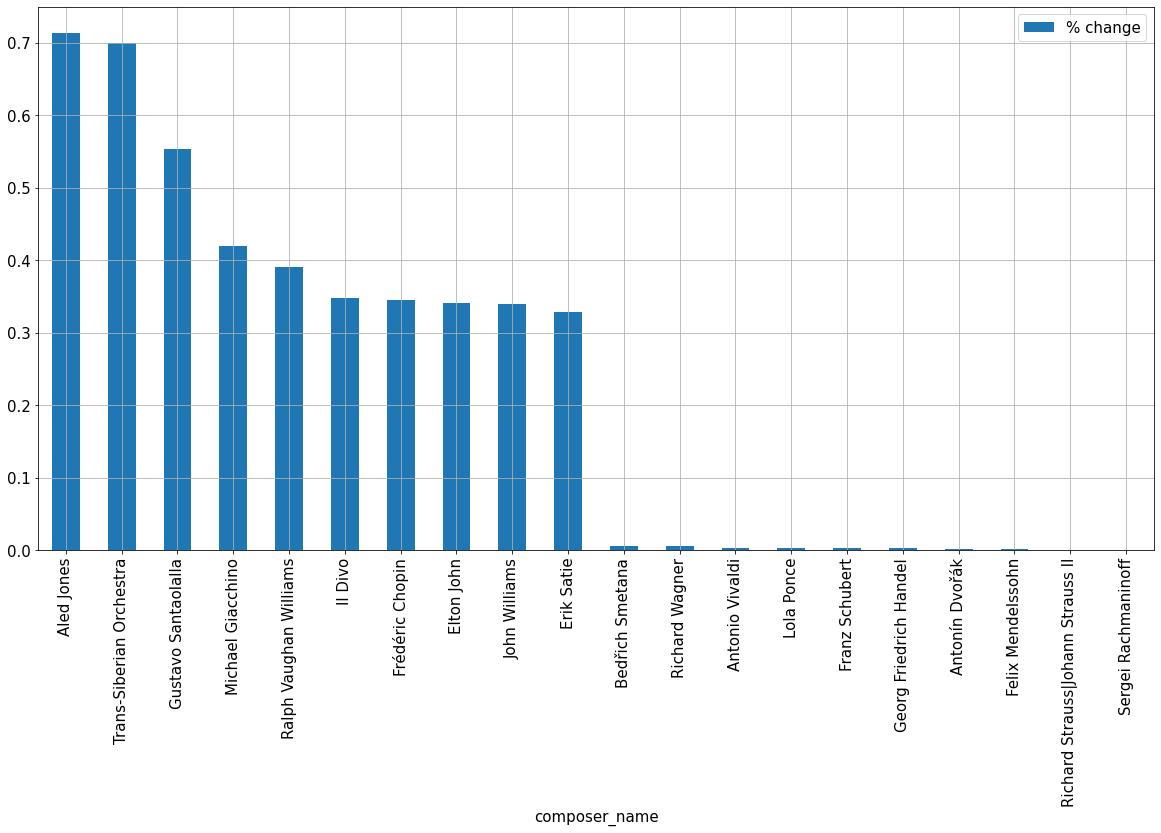

In [36]:
top_bottom_10_comp_last_pl = composer_changes[3][:10].append(composer_changes[3][-10:]).drop_duplicates()
top_bottom_10_comp_last_pl.plot.bar(x='composer_name', y='avg_change', grid=True, label='% change', figsize=(20, 10))

### Last.fm (By Listeners)

<AxesSubplot:xlabel='composer_name'>

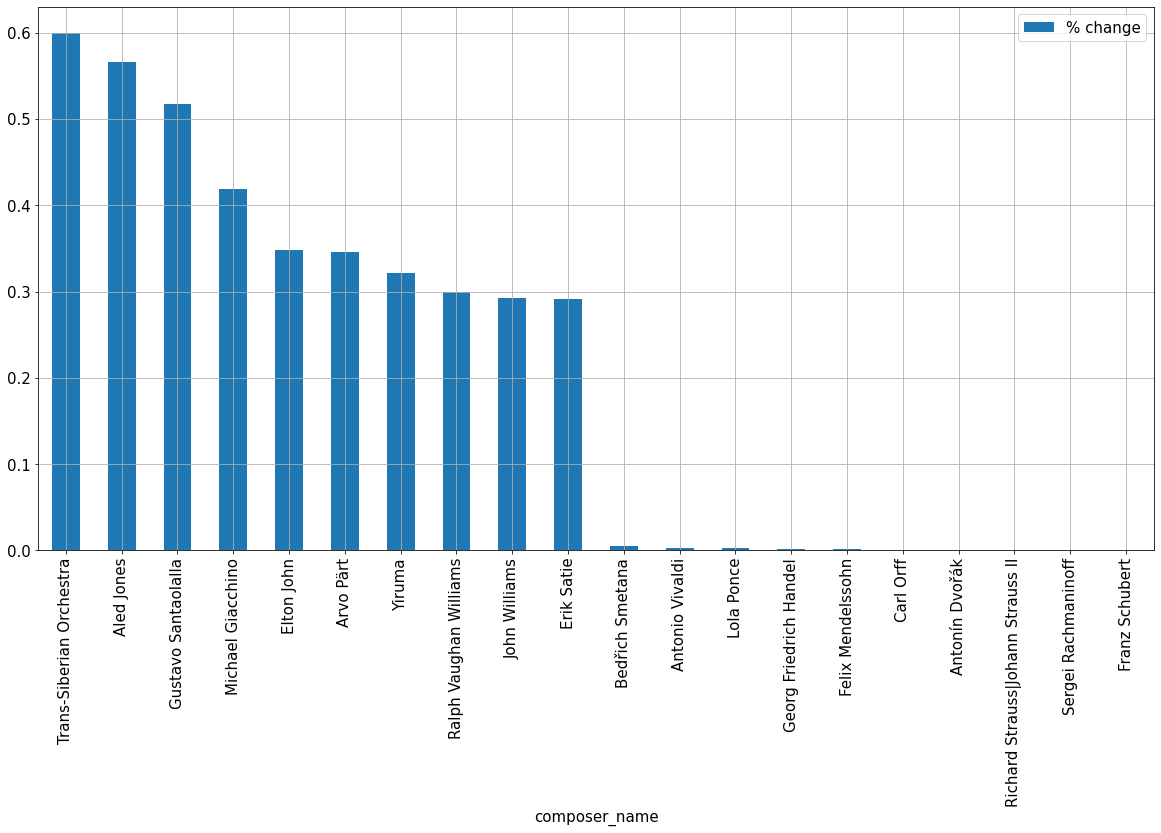

In [37]:
top_bottom_10_comp_last_ls = composer_changes[4][:10].append(composer_changes[4][-10:]).drop_duplicates()
top_bottom_10_comp_last_ls.plot.bar(x='composer_name', y='avg_change', grid=True, label='% change', figsize=(20, 10))

### Tidal

<AxesSubplot:xlabel='composer_name'>

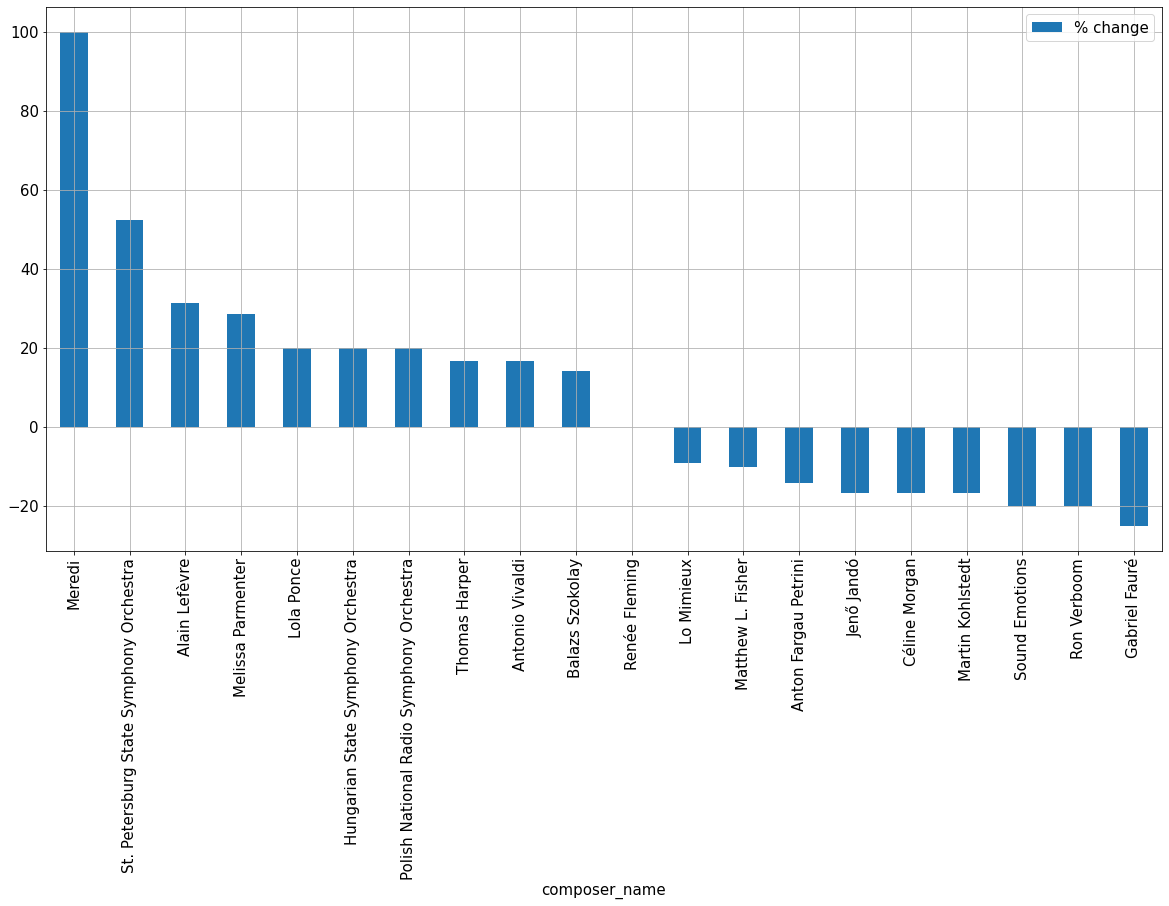

In [38]:
top_bottom_10_comp_tid = composer_changes[5][:10].append(composer_changes[5][-10:]).drop_duplicates()
top_bottom_10_comp_tid.plot.bar(x='composer_name', y='avg_change', grid=True, label='% change', figsize=(20, 10))